In [97]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


## importer les données


In [98]:
#importer mes donnees 
data = pd.read_csv("SuperMarket Analysis.csv")

#afficher les 5 premieres lignes 
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [99]:
#lignes et colonnes manquantes 
lignes_manquantes = data.isnull().sum(axis=1)
colonnes_manquantes = data.isnull().sum()
print(f"les lignes manquantes sont : {lignes_manquantes}")
print(f"les colonnes manquantes sont : {colonnes_manquantes}")

#voir les doublons
doublons = data.duplicated().sum() 
print(f"les doublons sont : {doublons}") 

#supprimer les doublons
data = data.drop_duplicates() 



#verifier que les colonnes int contiennent des valeurs numeriques 
data["Unit price"] = pd.to_numeric(data["Unit price"], errors='coerce') 
data["Quantity"] = pd.to_numeric(data["Quantity"], errors='coerce') 
data["Sales"] = pd.to_numeric(data["Sales"], errors='coerce')
data["Rating"] = pd.to_numeric(data["Rating"], errors='coerce')



les lignes manquantes sont : 0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64
les colonnes manquantes sont : Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
les doublons sont : 0


In [103]:
#avoir les donnes aberantes avec la methode interquantile 
#fonction detecter les valeurs aberantes 
def valeur_manquante(df , colonne) :
    q1 = df[colonne].quantile(0.25)
    q3 = df[colonne].quantile(0.75)
    iqr = q3 - q1
    born_sup = q3 + 1.5 * iqr
    born_inf = q1 - 1.5 * iqr
    return df[(df[colonne] < born_inf) | (df[colonne] > born_sup)][colonne] 

#suuprimer les valeurs aberantes pour les colonnes numeriques
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data = data[~((data[col] < data[col].quantile(0.25)) | (data[col] > data[col].quantile(0.75)))] #supprimer les valeurs aberantes
    
 
#changer la colonne en Date 
data["Date"] = pd.to_datetime(data["Date"] , errors='coerce')
print(data["Date"].dtypes)


#verifier que sales est egal a la multiplication de unit price et quantity + tax 5% pour toute les lignes
if data['Sales'].equals((data['Unit price'] * data['Quantity']) + (data['Tax 5%'])):
    print("Sales est egal a la multiplication de unit price et quantity + tax 5% pour toute les lignes")
    
    



    

datetime64[ns]
Sales est egal a la multiplication de unit price et quantity + tax 5% pour toute les lignes


## Analyse Exploratoire des Données

le nombre de lignes est : 1000
le nombre de colonnes est : 17
la moyenne des ventes est : 322.966749
le maximum des ventes est : 1042.65
le minimum des ventes est : 10.6785
l'ecart type des ventes est : 245.88533510097207


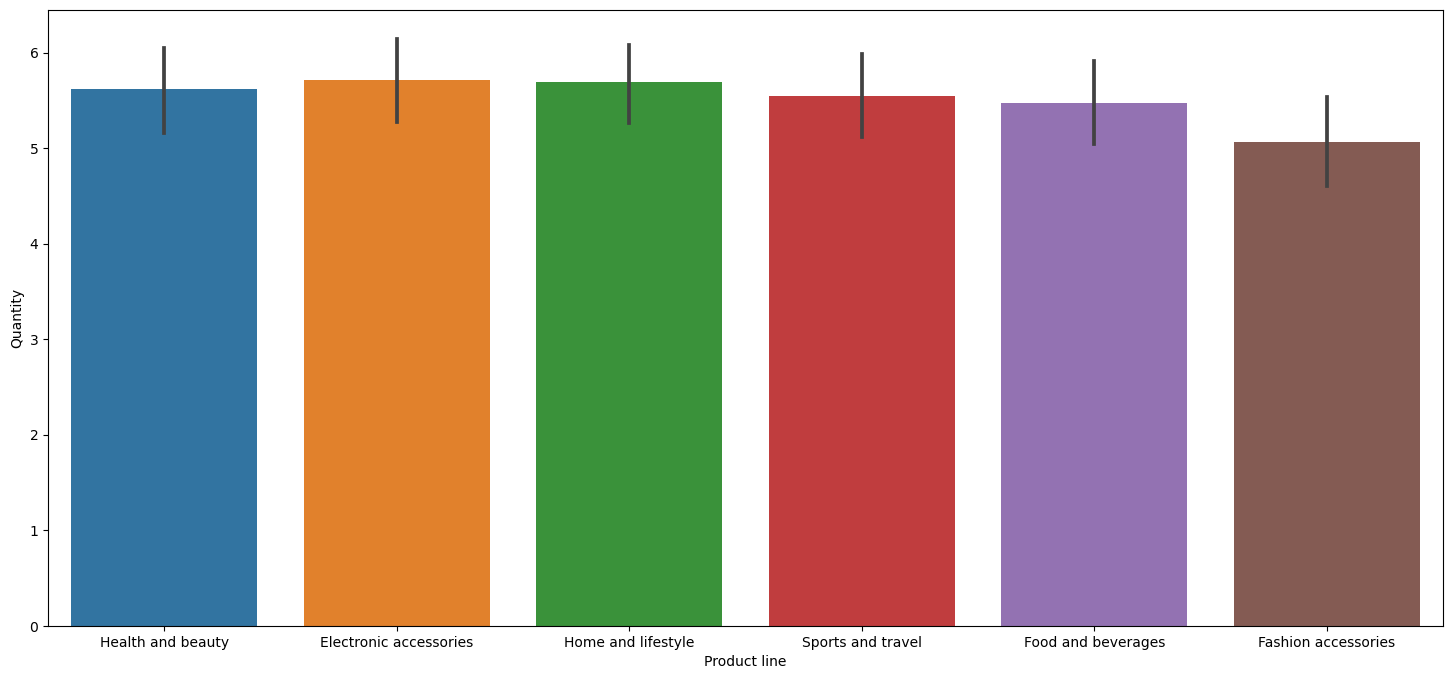

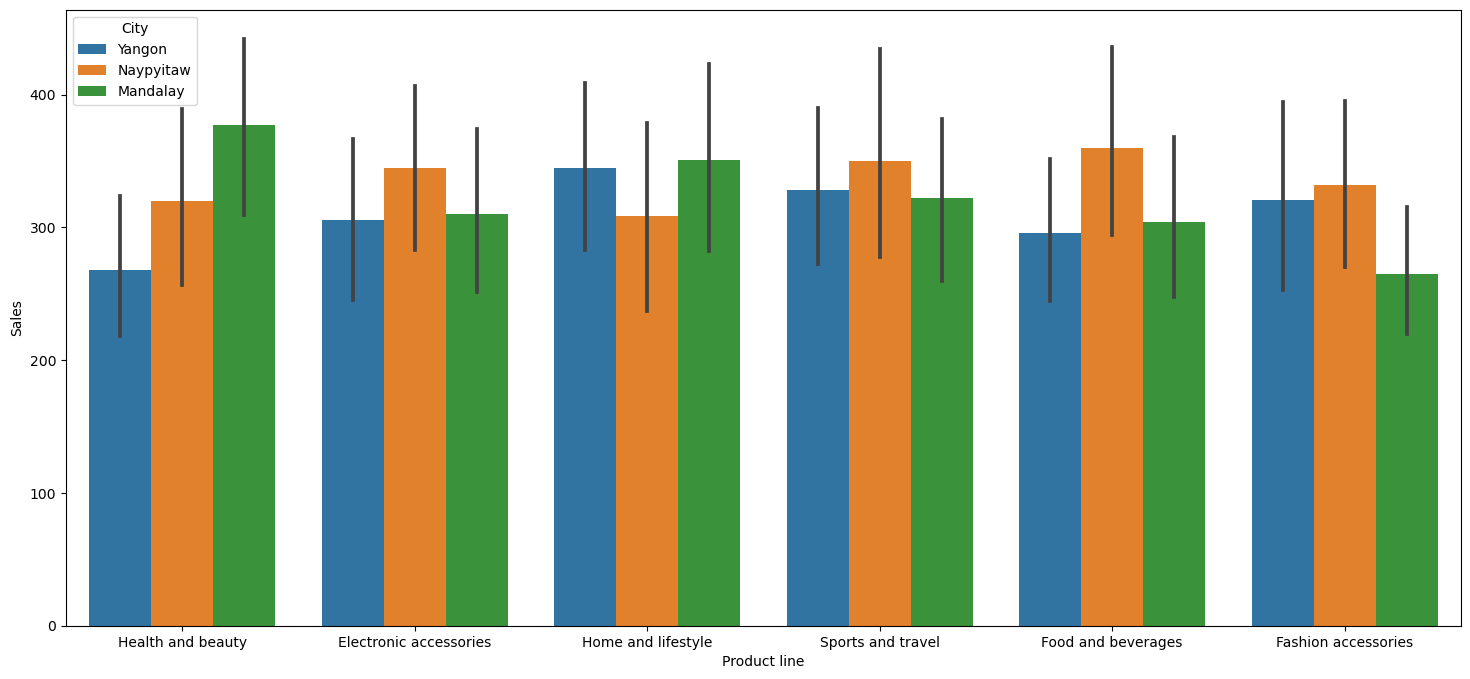

In [ ]:
data = pd.read_csv("SuperMarket Analysis.csv")

#nombre de lig,nes et colonnes
print(f"le nombre de lignes est : {data.shape[0]}")
print(f"le nombre de colonnes est : {data.shape[1]}")

#moyenne des ventes maximum et minimum ecart type
moyenne = data["Sales"].mean()
maximum = data["Sales"].max()
minimum = data["Sales"].min()
ecart_type = data["Sales"].std()
print(f"la moyenne des ventes est : {moyenne}")
print(f"le maximum des ventes est : {maximum}")
print(f"le minimum des ventes est : {minimum}")
print(f"l'ecart type des ventes est : {ecart_type}")

 #histogramme de la quantite par ligne de produit
plt.figure(figsize=(18, 8))
sns.barplot(x = "Product line" , y = "Quantity" , data = data )
plt.show()



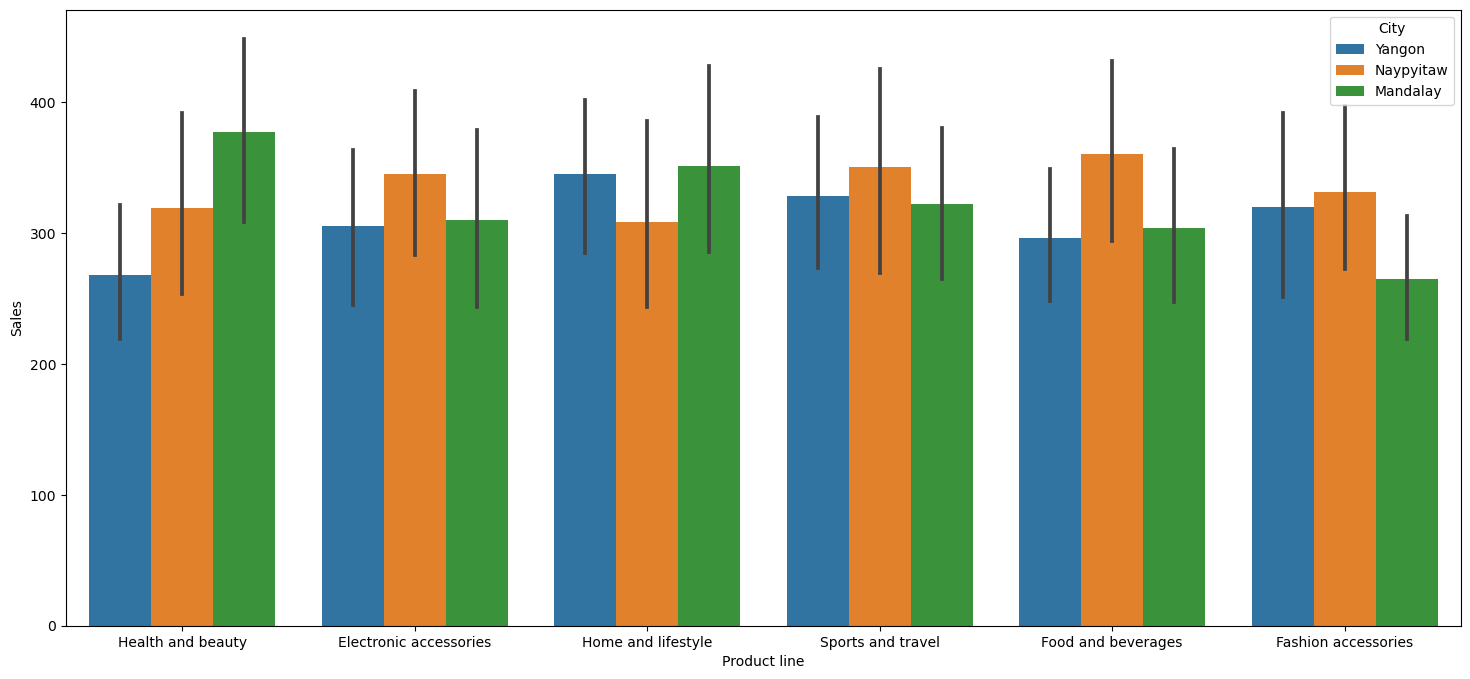

In [121]:
#histogramme des vezntes par categories en fonction des villes 
plt.figure(figsize=(18, 8))
sns.barplot(x = "Product line" , y = "Sales" , data = data , hue = "City")
plt.show()

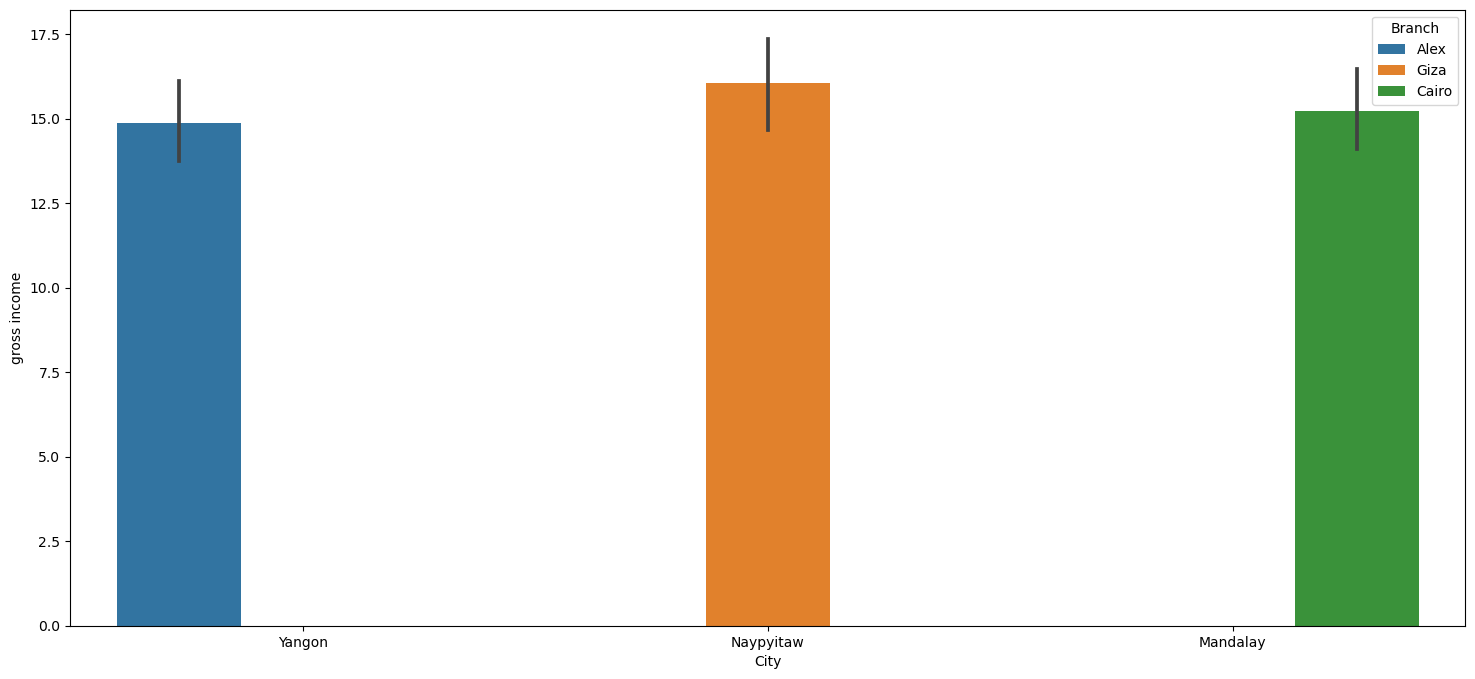

In [124]:
#graphe pour voir les chiffres des supermarches en fonction des villes
plt.figure(figsize=(18, 8))
sns.barplot(x = "City" , y = "gross income" , data = data , hue = "Branch") #lle chiffre d'affaire pour chaque supermarche
plt.show()

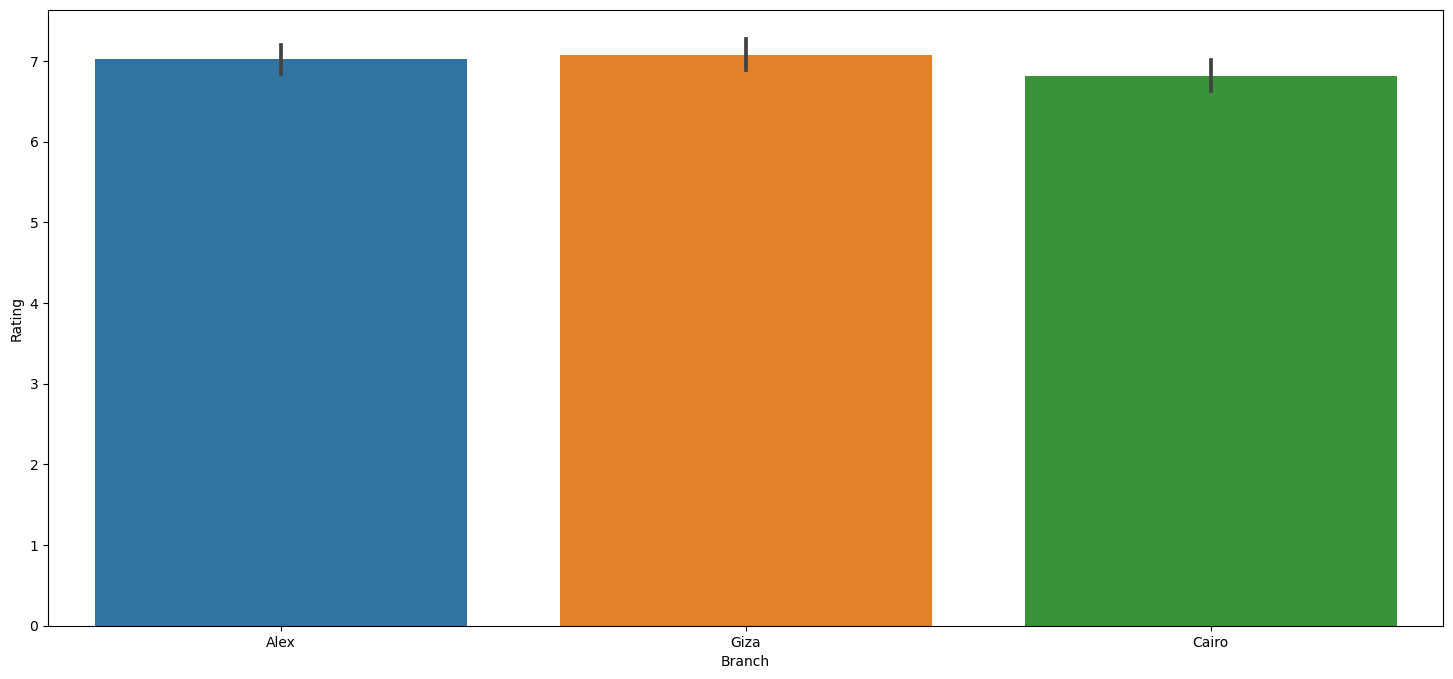

In [130]:
#satisfaction des clients en fonction des villes
plt.figure(figsize=(18, 8))
sns.barplot(x = "Branch" , y = "Rating" , data = data  )  #la satisfaction des clients pour chaque supermarche
plt.show() 

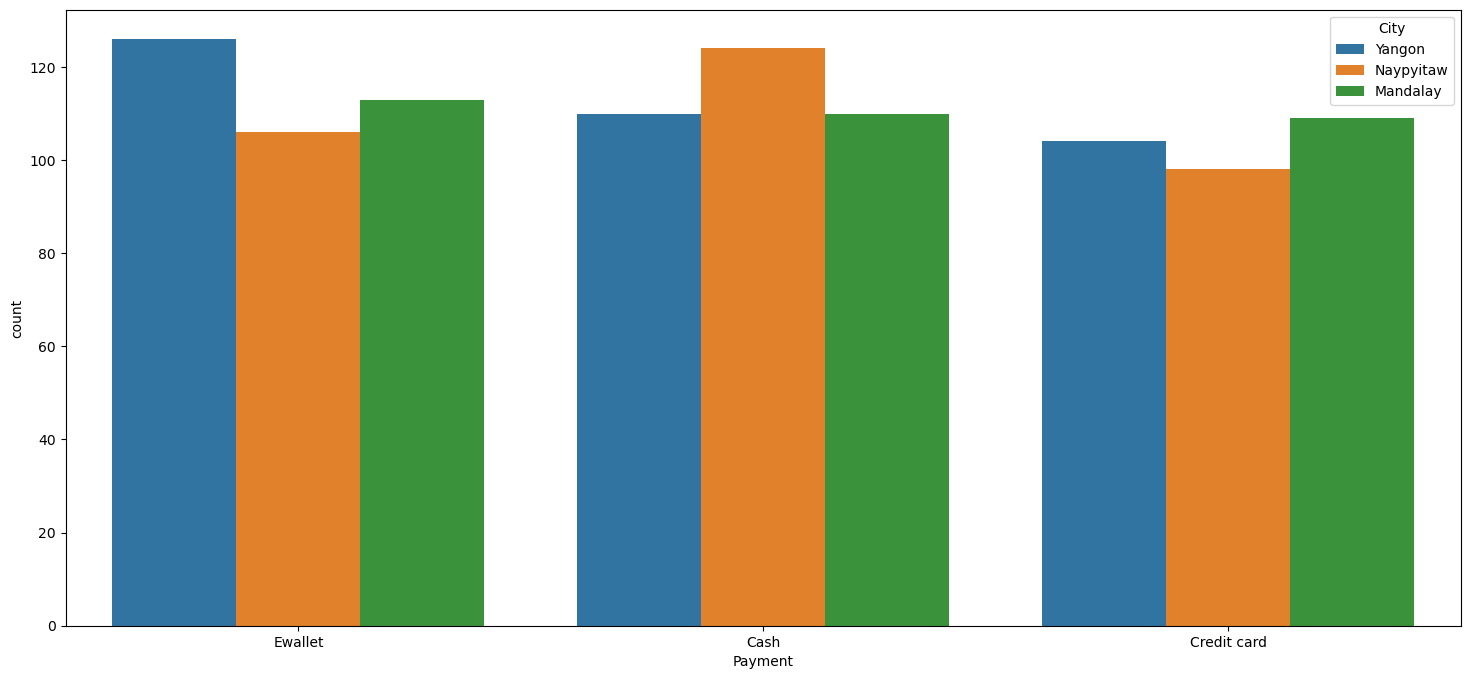

In [133]:
#mode de paiement  preferes en fonction des villes 
plt.figure(figsize=(18, 8))
sns.countplot(x = "Payment" , data = data  , hue="City")  #le mode de paiement preferes pour chaque supermarche 
plt.show()


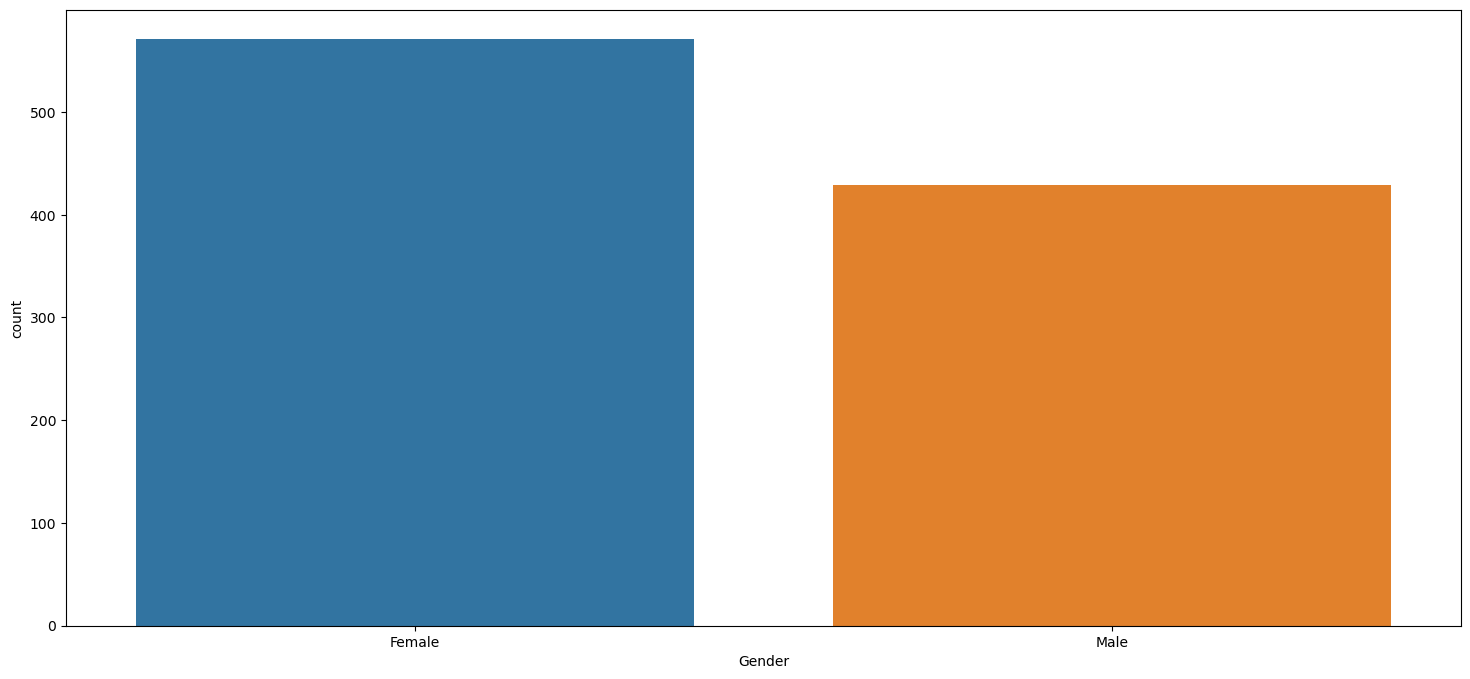

In [136]:
#homme et femme qui achetent le plus
plt.figure(figsize=(18, 8))
sns.countplot(x="Gender", data=data)   
plt.show()


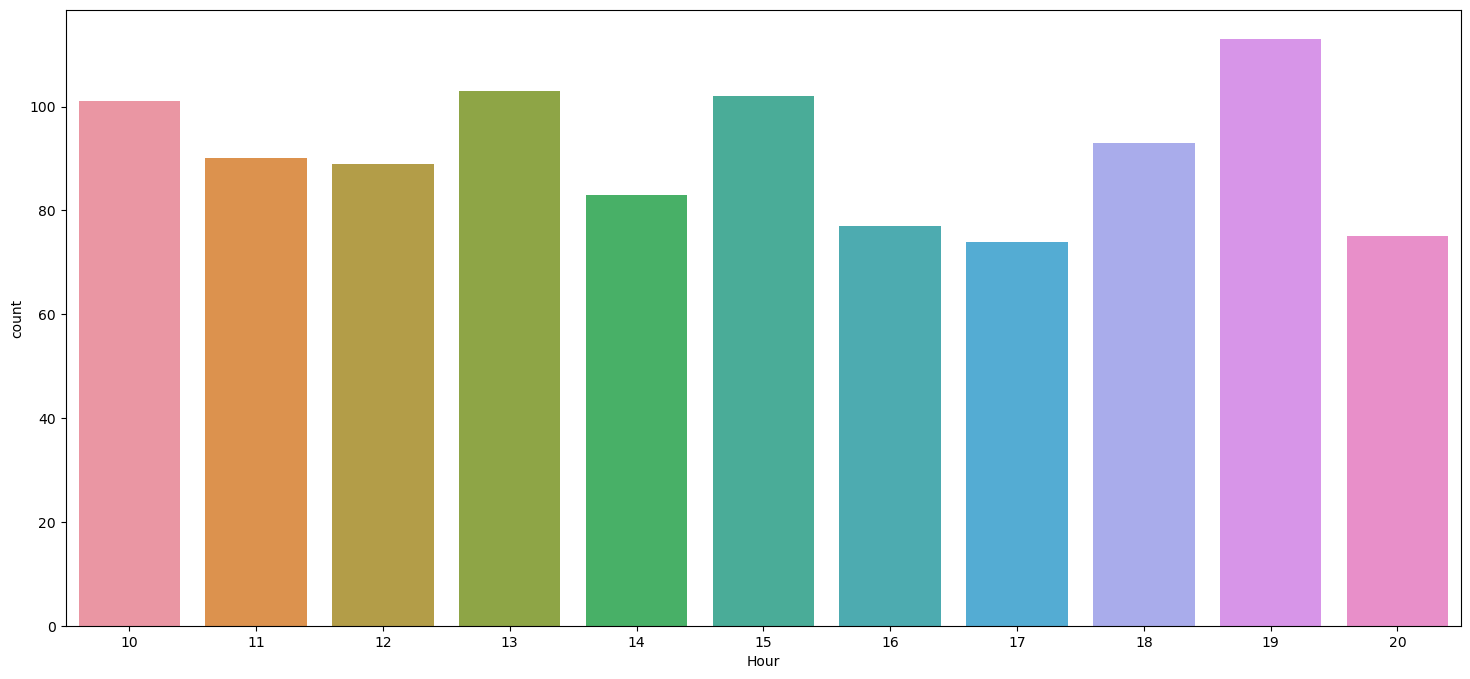

In [ ]:
#extraire lheure avec time et pm ou amm 
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data["Hour"] = data["Time"].dt.hour #extraire l'heure

plt.figure(figsize=(18, 8))
sns.countplot(x="Hour", data=data) #l'heure du rush est a 19heure
plt.show()
